<a href="https://colab.research.google.com/github/Danil-Kazakov/Data-HW2/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2           

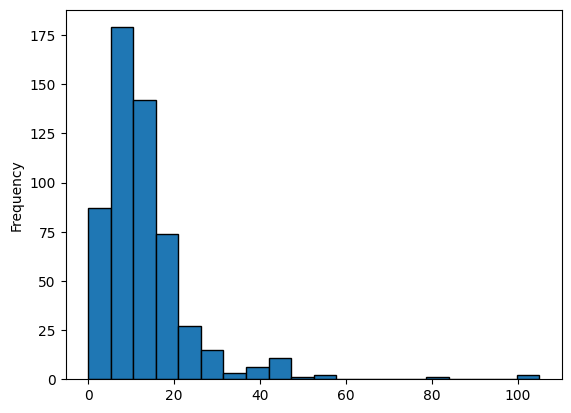

105
0
13.1
11.0
4.9
52
Where the Crawdads Sing
Publication Manual of the American Psychological Association, 6th Edition
20
1
Old School (Diary of a Wimpy Kid #10)
82
0
105
0
(248, 2)
author        Jeff Kinney
Book Count             12
Name: 120, dtype: object
Donna Tartt
3.9
Muriel Barbery


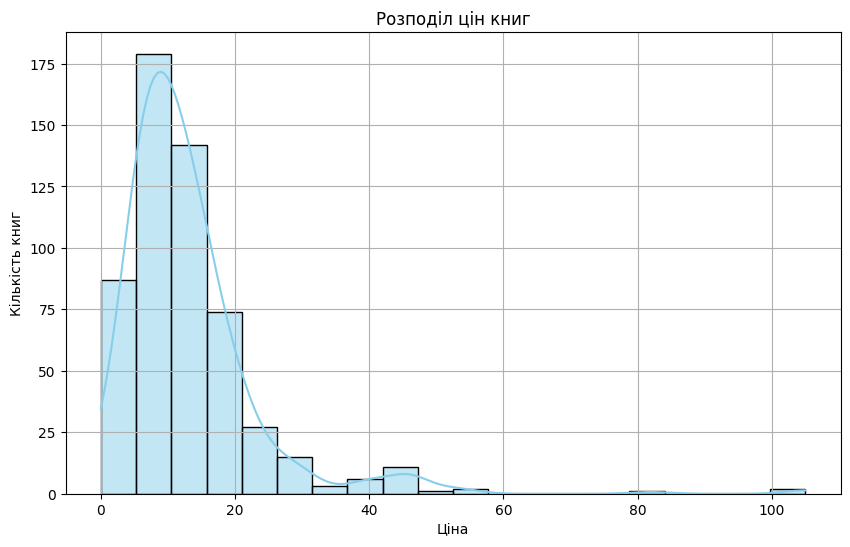

<ipython-input-39-70ef0b07cc62>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='user_rating', data=df, palette='Set3')


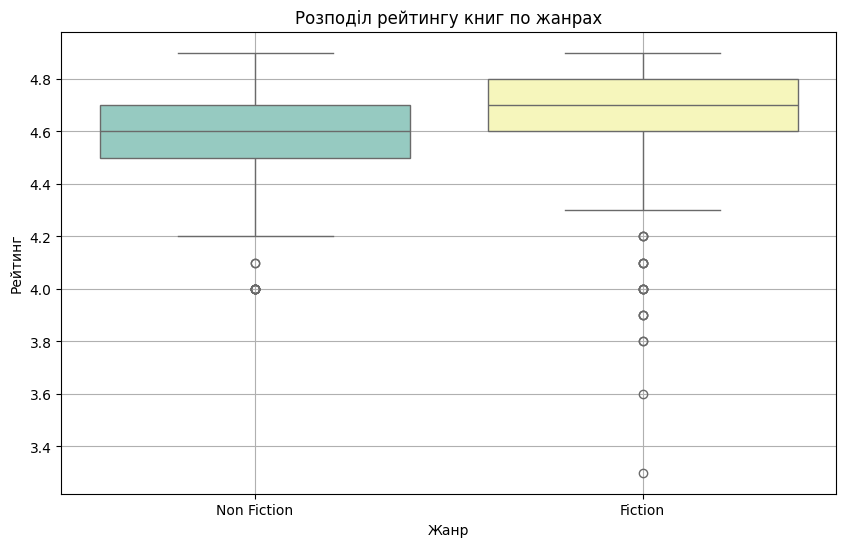

<ipython-input-39-70ef0b07cc62>:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Book Count', y='author', data=author_book_counts.sort_values(by='Book Count', ascending=False).head(10), palette='viridis')


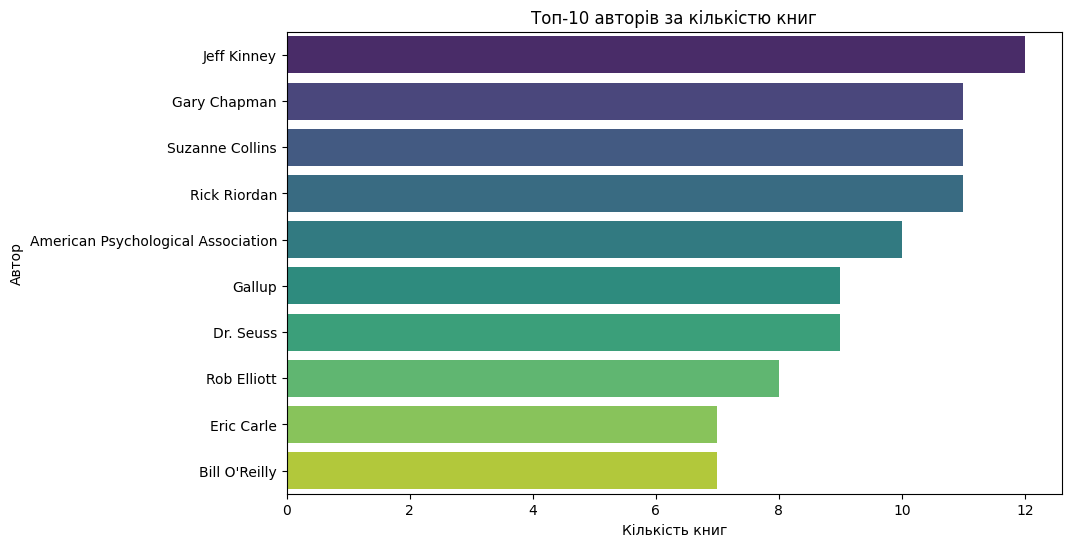

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("bestsellers with categories.csv")
print(df.head())

df_shape = df.shape
print(df_shape)
# Про скільки книг зберігає дані датасет?
# Відповідь: 550

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df)

missing_data = df.isna().sum()
print(missing_data)
# Чи є в якихось змінних пропуски?
# Відповідь: Hi

unique_data = df["genre"].unique()
print(unique_data)
# Які є унікальні жанри?
# Відповідь: 'Non Fiction' 'Fiction'

df['price'].plot(kind='hist', bins=20, edgecolor='black')
plt.show()

max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
print(max_price)
print(min_price)
print(mean_price)
print(median_price)
# Максимальна ціна?
# Відповідь: 105
# Мінімальна ціна?
# Відповідь: 0
# Середня ціна?
# Відповідь: 13.1
# Медіанна ціна?
# Відповідь: 11.0

max_rating = df["user_rating"].max()
print(max_rating)
# Який рейтинг у датасеті найвищий?
# Відповідь: 4.9

count_rating = df[df['user_rating'] == max_rating].shape[0]
print(count_rating)
# Скільки книг мають такий рейтинг?
# Відповідь: 52

max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
print(max_reviews_book)
# Яка книга має найбільше відгуків?
# Відповідь: "Where the Crawdads Sing"

top_50_2015 = df[df['year'] == 2015]
most_expensive_book_2015 = top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]['name'].values[0]
print(most_expensive_book_2015)
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
# Відповідь: "TPublication Manual of the American Psychological Association, 6th Edition"

fiction_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print(fiction_2010)
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
# Відповідь: 20

books_with_rating = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(books_with_rating)
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
# Відповідь: 1

books_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books = books_under_8.sort_values(by='price')
last_book = sorted_books['name'].values[-1]
print(last_book)
# Яка книга остання у відсортованому списку?
# Відповідь: "Old School (Diary of a Wimpy Kid #10)"

genre_price = df.groupby("genre")["price"].agg(["max", "min"])
max_fiction_price = genre_price.loc['Fiction', 'max']
min_fiction_price = genre_price.loc['Fiction', 'min']
max_non_fiction_price = genre_price.loc['Non Fiction', 'max']
min_non_fiction_price = genre_price.loc['Non Fiction', 'min']
print(max_fiction_price)
print(min_fiction_price)
print(max_non_fiction_price)
print(min_non_fiction_price)
# Максимальна ціна для жанру Fiction:
# Відповідь: 82
# Мінімальна ціна для жанру Fiction:
# Відповідь: 0
# Максимальна ціна для жанру Non Fiction:
# Відповідь: 105
# Мінімальна ціна для жанру Non Fiction:
# Відповідь: 0

author_book_counts = df.groupby('author')['name'].count().reset_index(name='Book Count')
table_shape = author_book_counts.shape
print(table_shape)
# Якої розмірності вийшла таблиця?
# Відповідь: 242

most_books_author = author_book_counts.loc[author_book_counts['Book Count'].idxmax()]
print(most_books_author)
# Який автор має найбільше книг?
# Відповідь: Jeff Kinney
# Скільки книг цього автора?
# Відповідь: 12

middle_rating_author = df.groupby('author')["user_rating"].mean().reset_index(name='Average Rating')
min_rating_author = middle_rating_author.loc[middle_rating_author['Average Rating'].idxmin()]
print(min_rating_author['author'])
print(min_rating_author['Average Rating'])
# У якого автора середній рейтинг мінімальний?
# Відповідь: Donna Tartt
# Який у цього автора середній рейтинг?
# Відповідь: 3.9

combined_df = pd.concat([author_book_counts.set_index('author'), middle_rating_author.set_index('author')], axis=1)
sorted_combined_df = combined_df.sort_values(by=['Book Count', 'Average Rating'])
first_author = sorted_combined_df.index[0]
print(first_author)
# Який автор перший у списку?
# Відповідь: Muriel Barbery

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Розподіл цін книг')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='user_rating', data=df, palette='Set3')
plt.title('Розподіл рейтингу книг по жанрах')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.grid(True)
plt.show()


author_book_counts = df.groupby('author')['name'].count().reset_index(name='Book Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Book Count', y='author', data=author_book_counts.sort_values(by='Book Count', ascending=False).head(10), palette='viridis')
plt.title('Топ-10 авторів за кількістю книг')
plt.xlabel('Кількість книг')
plt.ylabel('Автор')
plt.show()
